# Notebook for the fitting of the growth equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm
from scipy.optimize import curve_fit

%matplotlib inline

sns.set()

In [2]:
def growth(a, B, T, h, ec50, **kwargs):
    return B + (T-B)/(1 + (a/ec50)**h)

## Load and edit data

In [3]:
gd = pd.read_csv('data/growth_rates_long.csv')
gd = gd.rename(columns={'Allele': 'Strain'})
gd['Strain'] = gd['Strain'].replace({'Triple': 'TEM-52', 'G238S': 'TEM-19'})
gd

,Strain,CTX,Replicate,growth rate
0,TEM-52,4096.00000,1,0.021195
1,TEM-52,2048.00000,1,0.135151
2,TEM-52,1024.00000,1,0.140168
3,TEM-52,512.00000,1,0.151600
4,TEM-52,256.00000,1,0.143139
5,TEM-52,128.00000,1,0.130756
6,TEM-52,64.00000,1,0.132731
7,TEM-52,0.00000,1,0.188231
8,TEM-19,2.00000,1,0.034447
9,TEM-19,1.00000,1,0.036098


In [4]:
gd.head()

,Strain,CTX,Replicate,growth rate
0,TEM-52,4096.0,1,0.021195
1,TEM-52,2048.0,1,0.135151
2,TEM-52,1024.0,1,0.140168
3,TEM-52,512.0,1,0.151600
4,TEM-52,256.0,1,0.143139


In [5]:
gd.columns = [c.replace(' ', '_') for c in gd.columns]


In [6]:
gd_copy = gd.copy()
gd.loc[(gd.growth_rate < 0.1),'growth_rate'] = 0 #lower than 0.1 is no obsurved growth
gd = gd.loc[~((gd['Strain']=='TEM-19') & (gd['CTX']==2)),:] #remove cases where there is death
gd.loc[(gd.CTX == 0),'CTX'] = 10e-7 #make sure we can take a log
#Add the death rates from the measusments
gd = gd.append(pd.DataFrame({"Strain":['TEM-19', 'TEM-19'],"CTX":[12.5, 25], "Replicate":[4,4], "growth_rate":[-1.59, -1.54]}),ignore_index=True)

C:\Users\meike\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Average growth rates used in the serial transfer model

In [8]:
gd[gd['CTX']==10e-7].groupby('Strain').mean()

,CTX,Replicate,growth_rate
Strain,,,
TEM-19,0.000001,2.0,0.189650
TEM-52,0.000001,2.0,0.184628


## Fit growth of TEM-52 depending on CTX (used for continuous model)

In [10]:
datafitTriple = gd.loc[gd['Strain']=='TEM-52']['CTX'].values
datafitTripleRes = gd.loc[gd['Strain']=='TEM-52']['growth_rate'].values

In [11]:
popt, pcov = curve_fit(growth, datafitTriple, datafitTripleRes, p0=[ -5, 0.14, 5,  9000], bounds=([-100,0,0.01,0.01],[100,100,100,100000]))

In [12]:
popt

array([-9.65432637e+01,  1.45904776e-01,  3.39708830e+00,  2.77159160e+04])

## Fit growth of TEM-19 depending on CTX (used for continuous model)

In [14]:
datafitTriple = gd.loc[gd['Strain']=='TEM-19']['CTX'].values
datafitTripleRes = gd.loc[gd['Strain']=='TEM-19']['growth_rate'].values

In [15]:
poptG, pcovG = curve_fit(growth, datafitTriple, datafitTripleRes, p0=[-1.565, 0.18, 4, 1.4], bounds=([-100,0,0.01,0.01],[100,100,100,100]))

In [16]:
poptG

array([-1.56639982,  0.18261494,  3.4209448 ,  1.87257939])

## Visualize fit

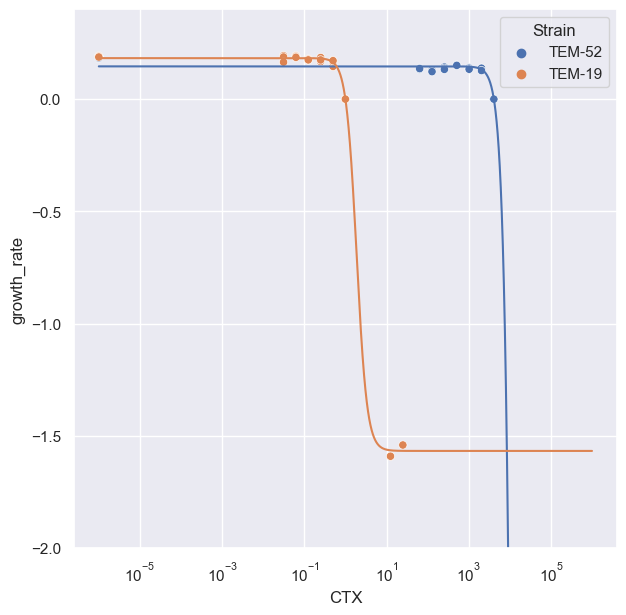

In [18]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale='log', ylim=[-2,0.4])
sns.scatterplot(data=gd, x="CTX", y="growth_rate", hue="Strain", ax=ax)
ax.plot(np.logspace(-6, 6, num=10000), growth(np.logspace(-6, 6, num=10000), *popt))
ax.plot(np.logspace(-6, 6, num=10000), growth(np.logspace(-6, 6, num=10000), *poptG))

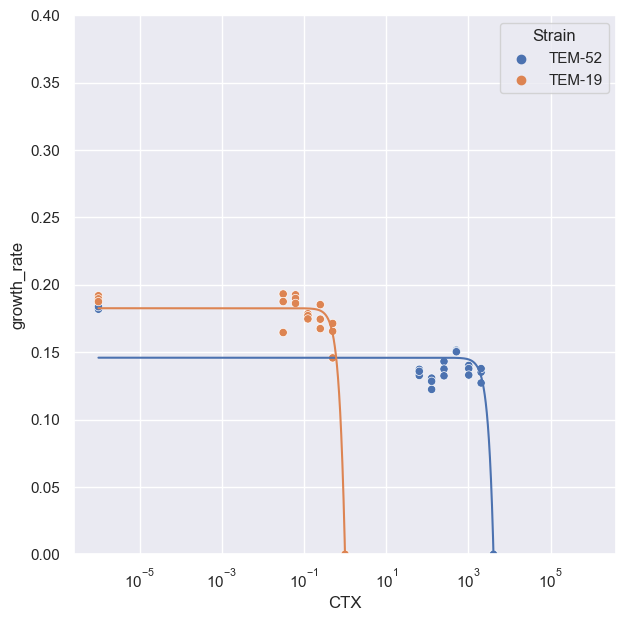

In [19]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale='log', ylim=[0,0.4])
sns.scatterplot(data=gd, x="CTX", y="growth_rate", hue="Strain", ax=ax)
ax.plot(np.logspace(-6, 6, num=10000), growth(np.logspace(-6, 6, num=10000), *popt))
ax.plot(np.logspace(-6, 6, num=10000), growth(np.logspace(-6, 6, num=10000), *poptG))

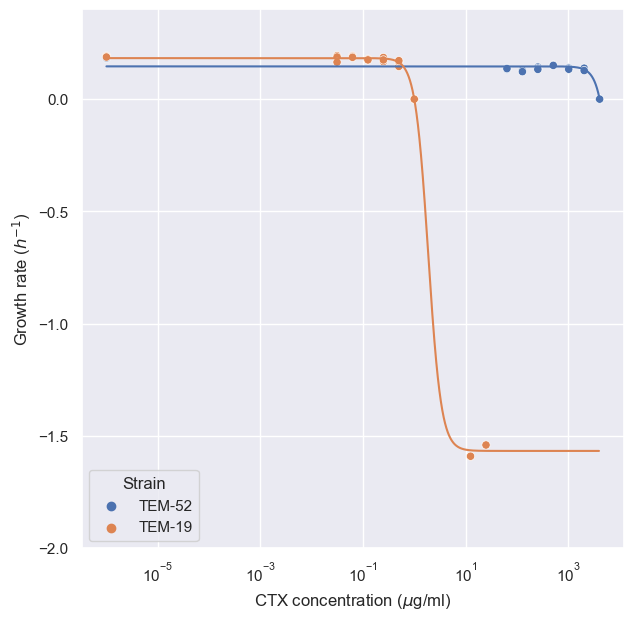

In [21]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale='log', ylim=[-2,0.4])
sns.scatterplot(data=gd, x="CTX", y="growth_rate", hue="Strain", ax=ax)
ax.plot(np.logspace(-6, 3.6, num=8000), growth(np.logspace(-6, 3.6, num=8000), *popt))
ax.plot(np.logspace(-6, 3.6, num=8000), growth(np.logspace(-6, 3.6, num=8000), *poptG))
ax.set_ylabel(r'Growth rate ($h^{-1}$)')
ax.set_xlabel(r'CTX concentration ($\mu$g/ml)')
#plt.savefig("growth_fit.jpg")